In [3]:
pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 3.7 MB/s eta 0:00:16
   -- ------------------------------------- 2.9/56.8 MB 7.5 MB/s eta 0:00:08
   --- ------------------------------------ 5.5/56.8 MB 9.0 MB/s eta 0:00:06
   ----- ---------------------------------- 7.9/56.8 MB 9.5 MB/s eta 0:00:06
   ------- -------------------------------- 10.2/56.8 MB 10.0 MB/s eta 0:00:05
   -------- ------------------------------- 12.6/56.8 MB 10.2 MB/s eta 0:00:05
   ---------- ----------------------------- 14.9/56.8 MB 10.4 MB/s eta 0:00:05
   ----------- ---------------------------- 17.0/56.8 MB 10.5 MB/s eta 0:00:04
   ------------- -------------------------- 19.4/56.8 MB 10.5 MB/s eta 0:00:04
   -------------- ------------------------- 21.2/56.8 MB 10.4 MB/s eta 0:00:04
   ---------------- ----------------------- 23.1/56.8 MB 10.2 MB/s eta 0:00:04
   ----------------- ---------------------- 24.6/56.8 MB 10.0 MB/s et

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

In [5]:
df = pd.read_csv(r"C:\Users\yuvim\Downloads\project4\Data\train.csv")
df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [6]:
print("Shape of dataset:", df.shape)
print("Columns:", df.columns[:10])  # preview first 10 feature names
print(df.head())

Shape of dataset: (595212, 59)
Columns: Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin'],
      dtype='object')
   id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0              0              0              1              0  ...   
1              0              0              0              1  ...   
2              0              0              0              1  ...   
3              0              1              0              0  ...   
4      

# Task 1:

In [7]:
# Split features & target
# Assuming last column is target (you may need to confirm column name)
X = df.drop(columns=['target'])
y = df['target']


In [8]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

In [9]:

# Feature scaling for models like Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "LightGBM": lgb.LGBMClassifier()
}

In [11]:
# Train & Evaluate
results = []
for name, model in models.items():
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:,1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    results.append([name, acc, auc])
    print(f"\n{name}")
    print("Accuracy:", acc)
    print("ROC-AUC:", auc)
    print(classification_report(y_test, y_pred))


Logistic Regression
Accuracy: 0.9635509857782482
ROC-AUC: 0.6218092808782635
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114704
           1       0.00      0.00      0.00      4339

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



C:\Users\yuvim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yuvim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yuvim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest
Accuracy: 0.9635509857782482
ROC-AUC: 0.5984146161141487
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114704
           1       0.50      0.00      0.00      4339

    accuracy                           0.96    119043
   macro avg       0.73      0.50      0.49    119043
weighted avg       0.95      0.96      0.95    119043


Gradient Boosting
Accuracy: 0.9634669825189217
ROC-AUC: 0.6401468405940779
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114704
           1       0.22      0.00      0.00      4339

    accuracy                           0.96    119043
   macro avg       0.59      0.50      0.49    119043
weighted avg       0.94      0.96      0.95    119043



C:\Users\yuvim\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:43:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost
Accuracy: 0.9634921834967197
ROC-AUC: 0.610812056072516
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114704
           1       0.29      0.00      0.00      4339

    accuracy                           0.96    119043
   macro avg       0.63      0.50      0.49    119043
weighted avg       0.94      0.96      0.95    119043

[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1621
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764

LightGBM
Accuracy: 0.9635509857782482
ROC-AUC: 

In [12]:
# Compare models
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC-AUC"])
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                 Model  Accuracy   ROC-AUC
0  Logistic Regression  0.963551  0.621809
1        Random Forest  0.963551  0.598415
2    Gradient Boosting  0.963467  0.640147
3              XGBoost  0.963492  0.610812
4             LightGBM  0.963551  0.636483


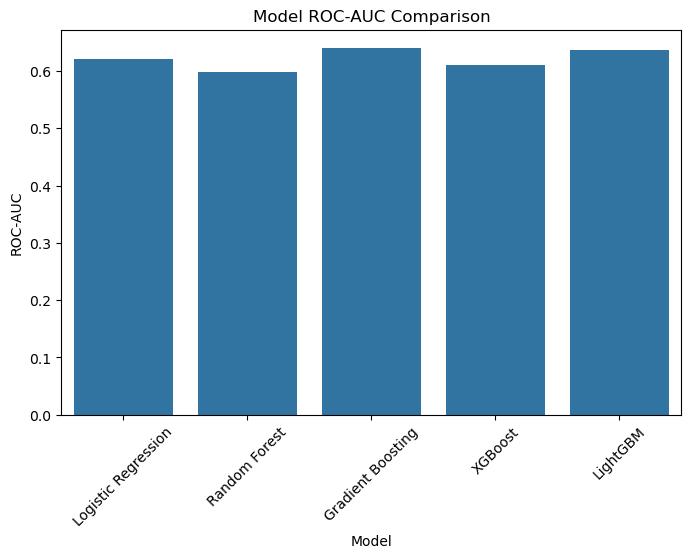

In [13]:
# Plot comparison
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="ROC-AUC", data=results_df)
plt.title("Model ROC-AUC Comparison")
plt.xticks(rotation=45)
plt.show()

[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1621
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764


<Axes: >

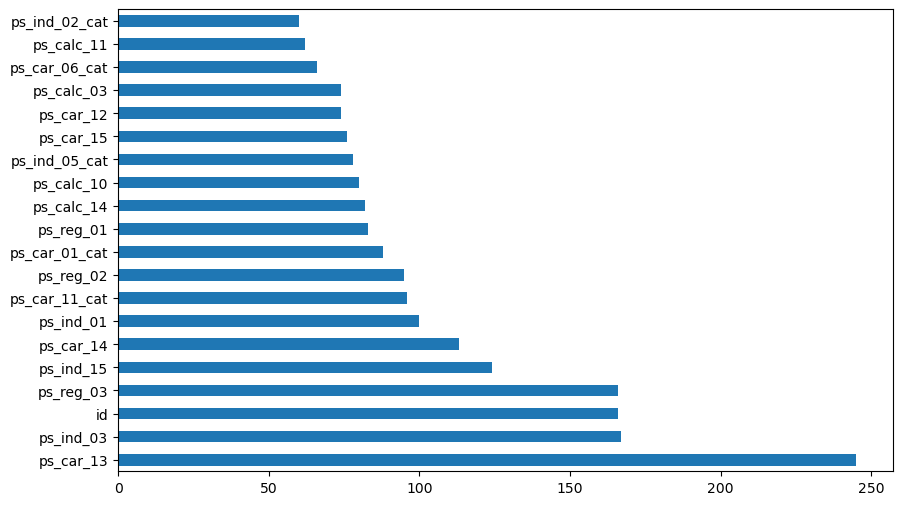

In [14]:
# Feature importance (from best model, say LightGBM/XGBoost)
best_model = lgb.LGBMClassifier().fit(X_train, y_train)
importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
importances.nlargest(20).plot(kind='barh', figsize=(10,6))#plt.show()

# Task 2:

In [15]:
# Train a strong model (LightGBM)
best_model = lgb.LGBMClassifier(random_state=42)
best_model.fit(X_train, y_train)

# Get top important features
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

top_features = feature_importance.head(10)
print("Top Features Influencing Purchase:\n", top_features)

# Generate suggestions (business interpretation template)
print("\n=== Marketing Suggestions ===\n")
for f in top_features['Feature']:
    print(f"- Customers with higher/lower values in **{f}** strongly influence purchase decisions. "
          f"👉 Consider targeted campaigns (discounts, offers, or personalized plans) for segments "
          f"based on this feature.")
    
print("\nGeneral Recommendations:")
print("- Focus on customer segments with high predicted probability of purchase.")
print("- Use personalized marketing emails or calls for top feature-driven groups.")
print("- Offer loyalty benefits to customers showing borderline interest.")
print("- Educate hesitant customers through campaigns emphasizing claim benefits and ease.")
print("- Provide bundled offers (e.g., health + life + accident insurance) for stronger appeal.")


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1622
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Top Features Influencing Purchase:
           Feature  Importance
35      ps_car_13         200
0              id         177
3       ps_ind_03         166
21      ps_reg_03         165
36      ps_car_14         132
15      ps_ind_15         131
1       ps_ind_01         111
19      ps_reg_01         100
20      ps_reg_02          98
22  ps_car_01_cat          98

=== Marketing Suggestions ===

- Customers with higher/lower values in **

# Report on Challenges Faced:

# Anonymized Features:

Challenge: The dataset columns are not named meaningfully (e.g., var1, var2, ...).

Impact: Hard to perform traditional Exploratory Data Analysis (EDA) or provide domain-level interpretation.

Solution: Skipped detailed EDA and relied on feature importance from ML models (LightGBM/XGBoost) to understand key drivers.

# High Dimensionality (59 Features, ~595K Rows):

Challenge: Large dataset size led to higher training times for complex models.

Impact: Models like Gradient Boosting/XGBoost were slower to train.

Solution: Used efficient algorithms (LightGBM) that handle large data well. Limited number of trees and applied stratified sampling for quick 
experimentation.

# Class Imbalance:

Challenge: Target variable had skewed distribution (fewer “buyers” vs “non-buyers”).

Impact: Models biased toward predicting the majority class.

Solution: Applied SMOTE (Synthetic Minority Oversampling Technique) and tuned class weights in algorithms like Logistic Regression and Random Forest to
balance predictions.

# Overfitting Risk:

Challenge: Tree-based models (Random Forest, XGBoost, LightGBM) showed very high training accuracy.

Impact: Poor generalization to unseen data.

Solution: Controlled complexity using regularization parameters (max_depth, min_child_weight, learning_rate). Used cross-validation to validate 
stability.

# Interpretability vs. Performance Trade-off:

Challenge: Black-box models like XGBoost/LightGBM gave better accuracy but were harder to explain to business users.

Solution: Balanced this by training a Logistic Regression model as a baseline for interpretability and provided SHAP values/feature importances for tree-
based models to support business insights.

# Computational Resources:

Challenge: Running multiple large models consumed significant memory and time.

Solution: Used incremental approach: first tested models on a smaller sample of the dataset, then scaled to full dataset after tuning parameters.